<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 1 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [14]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
data = pd.read_csv('./data/job_listings.csv')  


In [36]:
pd.set_option('max_colwidth', 0)
data.head(1)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply Now</div></div></div></div></div></div></div><div></div>""",Data scientist


In [162]:


cleaned_text = []

""" Make souped """
for description in data.description:
    soup = BeautifulSoup(description)
    text = soup.get_text(strip=True)
    text = re.sub("\\\\n", ' ', text)
    #noticed below that commas were left out so stripping them
    text = re.sub(r'[,.!?():;]', '', text)
    text = re.sub(r'/', ' ', text)
    cleaned_text.append(text)

data['cleaned_text'] = cleaned_text

In [163]:
data.head(2)

Unnamed: 0  \
0  0            
1  1            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## 2) Use Spacy to tokenize the listings 

In [113]:
##### Your Code Here #####
import spacy
nlp = spacy.load("en_core_web_lg")


In [114]:
doc = nlp(data.cleaned_text[0])
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha ==True)])

['requirement', 'conceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'Bayes', 'K', 'mean', 'SVM', 'Apriori', 'Logistic', 'Regression', 'Neural', 'Random', 'Forests', 'Decision', 'Trees', 'K', 'NN', 'hand', 'experience', 'Intermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role', 'exposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'dplyr', 'tidyR', 'r', 'ability', 'communicate', 'Model', 'finding', 'Technical', 'Non', 'technical', 'stake', 'holder', 'hand', 'experience', 'SQL', 'Hive', 'similar', 'programming', 'language', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article', 'Master', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field', 'apply']


In [164]:
from spacy.tokenizer import Tokenizer

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe
# make tokens


tokens = []


for doc in tokenizer.pipe(data.cleaned_text, batch_size=500):
    doc_tokens = [token.lemma_ for token in doc if (token.is_stop != True) 
                  and (token.is_punct != True)]
    tokens.append(doc_tokens)

data['tokens'] = tokens

In [165]:
#list of what's inside nlp.vocab, uncomment line below, gets you all the vocab in cleaned_text
#list(nlp.vocab.strings)

In [166]:
data.head(1)

,Unnamed: 0,description,title,cleaned_text,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply Now</div></div></div></div></div></div></div><div></div>""",Data scientist,"b""Job Requirements Conceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes K-Means SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python R Ability to write functions clean and efficient data manipulation are mandatory for this role Exposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot2 dplyr tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub Kaggle or any other published article Master's degree in Statistics Mathematics Computer Science or any other quant specific field Apply Now""","[b""Job, Requirements, Conceptual, understand, Machine, Learning, model, like, Nai\xc2\xa8ve, Bayes, K-Means, SVM, Apriori, Linear, , Logistic, Regression, Neural, Random, Forests, Decision, Trees, K-NN, hands-on, experience, 2, Intermediate, expert, level, code, skill, Python, R, Ability, write, function, clean, efficient, datum, manipulation, mandatory, role, Exposure, package, like, NumPy, SciPy, Pandas, Matplotlib, etc, Python, GGPlot2, dplyr, tidyR, R, Ability, communicate, Model, finding, Technical, Non-Technical, stake, holder, Hands, experience, SQL, Hive, similar, programme, language, past, work, GitHub, Kaggle, publish, article, Master's, degree, Statistics, Mathematics, Computer, Science, quant, specific, field, Apply, Now""]"


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [178]:
##### Your Code Here #####
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# list of text documents
data['tokens_joined'] = data.tokens.apply(lambda x: ' '.join(x))
text = data.tokens_joined

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)
dtm.shape

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!



(426, 7640)

In [180]:
data.head(1)

,Unnamed: 0,description,title,cleaned_text,tokens,tokens_joined
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply Now</div></div></div></div></div></div></div><div></div>""",Data scientist,"b""Job Requirements Conceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes K-Means SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python R Ability to write functions clean and efficient data manipulation are mandatory for this role Exposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot2 dplyr tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub Kaggle or any other published article Master's degree in Statistics Mathematics Computer Science or any other quant specific field Apply Now""","[b""Job, Requirements, Conceptual, understand, Machine, Learning, model, like, Nai\xc2\xa8ve, Bayes, K-Means, SVM, Apriori, Linear, , Logistic, Regression, Neural, Random, Forests, Decision, Trees, K-NN, hands-on, experience, 2, Intermediate, expert, level, code, skill, Python, R, Ability, write, function, clean, efficient, datum, manipulation, mandatory, role, Exposure, package, like, NumPy, SciPy, Pandas, Matplotlib, etc, Python, GGPlot2, dplyr, tidyR, R, Ability, communicate, Model, finding, Technical, Non-Technical, stake, holder, Hands, experience, SQL, Hive, similar, programme, language, past, work, GitHub, Kaggle, publish, article, Master's, degree, Statistics, Mathematics, Computer, Science, quant, specific, field, Apply, Now""]","b""Job Requirements Conceptual understand Machine Learning model like Nai\xc2\xa8ve Bayes K-Means SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees K-NN hands-on experience 2 Intermediate expert level code skill Python R Ability write function clean efficient datum manipulation mandatory role Exposure package like NumPy SciPy Pandas Matplotlib etc Python GGPlot2 dplyr tidyR R Ability communicate Model finding Technical Non-Technical stake holder Hands experience SQL Hive similar programme language past work GitHub Kaggle publish article Master's degree Statistics Mathematics Computer Science quant specific field Apply Now"""


In [187]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,02115,0305,0356,04,06366,08,10,100,1000,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [189]:
##### Your Code Here #####
doc_len = [len(doc) for doc in data.tokens]

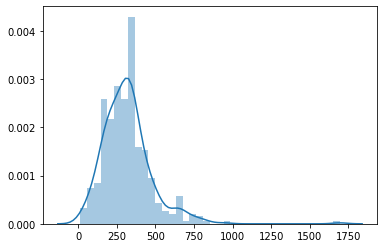

In [190]:
import seaborn as sns

sns.distplot(doc_len);


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [213]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',
                         #tokenizer = tokenize,
                         ngram_range = (1,2),
                         min_df = 0.05, 
                         max_df = 0.8,
                         max_features = 5000
                       )

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data.tokens_joined)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 1174)


,10,100,2019,401k,ability,ability communicate,ability work,able,able work,academic,...,x9d,xe2,xe2 x80,year,year experience,year relevant,year work,years,years xe2,york
0,0.0,0.0,0.0,0.0,0.134870,0.165729,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.026007,0.063915,0.0,0.0,0.0,0.0,...,0.0,0.178610,0.179045,0.023859,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.068303,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.039239,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.105283,0.105539,0.112511,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [214]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [219]:
resume = ["""
OFER BAHARAV
ofer.baharav@alumni.duke.edu – https://www.linkedin.com/in/oferbaharav Menlo Park, CA 415-305-1033
  SUMMARY
PROFESSIONAL EXPERIENCE
  
Product, engineering, and growth management leader passionate about building high quality products that customers love using.
Over 15 years experience scaling technical products from vision to execution while managing operations, zero to one growth to
$5M ARR, and teams of up to 30 employees. Provided leadership, analytical, and creative thinking for the design, build, launch,
pilot, and scale of innovative products. Operated with focus on customer empathy, simple design, organizational impact, and
global deployment. Maintained an amazing culture across the organization through agile methodology, leading teams for
maximum impact. Coach and go-to person with management experience and excellent communication skills who is excited about
helping and motivating team members to grow and excel in what they do best.
  REALVR, Los Altos, CA
Founder and Head of Product & Engineering
Dec 2016 – Present
l Designed and developed a cloud b2b platform for the creation of virtual reality walkthroughs for indoor spaces, increasingly using machine learning for optimizing the model to reach photorealistic results http://www.realvr.ai/hotel_lobby
l Employed hardware/software including LiDAR, a camera rig, and photogrammetry for scanning while using ML vision for identifying scanned objects and then replacing them with 3D database assets, thereby cutting scan costs by 80% and resolving common scan blemishes to produce high fidelity photo grade 3D models
l Trained company datasets using convolutional neural networks, deep learning, and transfer learning, constantly seeking to optimize classification and improve the model’s accuracy using AutoML in Google Cloud Platform and AWS SageMaker
l Built product using agile methodology: standups, weekly sprints, and continuous integration
l Piloted prototype with enterprise clients for AR/VR immersive 3D walkthroughs. Presented at industry events. l Planned product vision, strategy, roadmap, and release cycles
l Engineered machine learning algorithms in Python using Scikit-learn and TensorFlow
APPLIED LAYERS, Palo Alto, CA Dec 2015 – May 2016 Founder and Head of Product & Engineering
l Formed a team of 3 SaaS veterans with a vision for helping companies with sales predictions and recommendations using predictive analytics and Natural Language Processing
l Validated a SaaS predictive analytics and machine learning engine with 3 pilots, to output predictions and recommendations for sales teams. The engine automatically analyzed CRM data for creating predictive models and generating recommendations for increasing sales closing rates.
l Used cutting edge ML/AI algorithms to produce predictions and recommendations. Built reasoning into the system l After extensive conversations with investors decided to shelf the project
CALLIX, São Paulo, Brazil Jul 2014 – Dec 2015 CEO and Head of Product & Engineering
l Turned around this enterprise SaaS voice, analytics, and messaging call center platform, which was six months away from shut down prior to my arrival, when operations were in the red
l Managed 30 employees and 15 direct reports including product and engineering. Held regular 1:1s and performance reviews l Fixed and scaled the existing platform, re-architecting the product and addressing technical debt on a shoestring budget
l Increased server capacity to address burgeoning client load at peak usage hours, enabling seamless operations
l From vision to execution, defined and built a new platform that scaled to millions of users, using the best in WebRTC, Ruby
on Rails, and JavaScript, to form a unique click-to-call communications platform for e-commerce sales and customer
support calls. Integrated external APIs such as Zendesk and Salesforce
l Conducted rigorous piloting while iterating features and UX/UI based on user testing, metrics, and KPIs
l Used agile methodology with daily standups, bi-weekly sprints and frequent shipping
l Cut back features and costs by 50% by optimizing the product and deprecating less popular features and services
l Reduced customer support tickets by 80% as a consequence of technical improvements and upgrades to the old platform
l Reassigned underutilized technical support employees to technical sales, and built team of sales and customer success
experts, leading first to break even and an overall increase in sales of 20%. Brought company into the black
l Hired CFO and delivered dashboard KPIs to track daily progress for management and our investors
l Developed and influenced enterprise client relations including LatAm’s largest insurance and telecom operators
l Negotiated key contracts, agreements, and partnerships including with Latin America’s largest e-commerce, insurance, and
 
telecom groups. Vetted contracts through legal, finance, and board of directors.
l Presented product at industry events attracting PR coverage and demand for the new platform
l Positioned product as an alternative to highly taxed traditional telephony solutions in Brazil and prepared global expansion l Successfully raised capital at a crucial time in the company’s development
l Brought the company to an exit, and returned back to the US for personal reasons
PEER, Silicon Valley and São Paulo, Brazil Nov 2011 – July 2014 Founder and Head of Product
l Launched live video and messaging networking application for professionals within 9 months in Nov 2013
l Designed a new communications product for reconstructing video messaging conversations from asynchronous sources
l Defined product roadmap and milestones including: wireframes, features, usability tests, prototypes, pilots and launches
l Designed complex CoreOS architecture, hired expert iOS engineers to build in AVFoundation, AVKit, and Core Audio
l Built the product in WebRTC, achieving high platform quality, positioning, and scale
l Negotiated partnerships with university alumni networks to collaborate over a custom enterprise platform for this sector
l Led small business development, marketing, and PR teams, reaching thousands of users
l Launched mobile platform for buying and selling professional services using live video over LinkedIn’s social graph
l Raised capital, hired software engineers and UX/UI designers, built product roadmap, enrolled company in highly selective
LatAm accelerator, and negotiated key partnerships and legal contracts
l Represented company as panelist at conferences. Company won competitions and awards, including Mobile World Congress
JOHNNY LABS, Palo Alto, CA May 2010 – Present EIR
l As EIR at prominent Silicon Valley accelerators, was interim CXO and product advisor to several enterprise SaaS startups. Participated in funding and mergers and acquisition negotiations.
BRIMACOMB & ASSOCIATES LLC, Palo Alto, CA Partner
l Established and managed West Coast office for Brimacomb & Associates, a $30M VC fund and Venture Advisory l Worked with client CEOs in operations, strategy, and fund raising
l Helped with product, operations, growth and strategy, and negotiated complex contracts on behalf of clients
DOW JONES & COMPANY, San Francisco, CA Manager
l Managed a team of five Account Executives to sell VentureSource SaaS analytics and services to venture capital general and limited partners, and investment bankers, exceeding quota by 200%
ALFY, INC., New York, NY
Vice President of Business Development
l Formed all principal business development partnerships, and led company to recognized player in its sector l Instrumental in raising $42M in three rounds of funding
l Managed a team of 4 business development managers
EDUCATION
MBA, Global Management and Finance, Graduated 2007
Duke University, The Fuqua School of Business, Durham, NC
Elected Chair of Speaker Committee and successfully led the process with Mexico’s former president Vicente Fox, who spoke at commencement
Bachelor of Science, Information Systems; Graduated with Honors, 2002 University of Phoenix
NOTEWORTHY
l Intermediate Python machine learning programming skills; Fluent in English, Portuguese, and Hebrew
l EIR, advisor, and mentor at prominent Silicon Valley accelerators and startups 2008 – 2010, and 2015 – 2019 (recently at
Google Launchpad and Alchemist, also working with ML based tech transfer from Israel to Brazil with two agtech startups) l Neural Networks and Deep Learning concentration on Coursera (5 courses/ 8 mo curriculum). Certificates earned May, 2018 l Lambda School Machine Learning and Artificial Intelligence: 1.5 year course for ML engineering in Python (night class)
"""]

In [220]:
#similarity of my resume to job descriptions in dataset
new = tfidf.transform(resume)

In [221]:
new

<1x1174 sparse matrix of type '<class 'numpy.float64'>'
	with 169 stored elements in Compressed Sparse Row format>

In [222]:
nn.kneighbors(new.todense())

(array([[1.16715447, 1.17066331, 1.17125045, 1.18905458, 1.18905458]]),
 array([[385, 215,  83,  27,  66]]))

In [230]:
print(data.cleaned_text[385])

b'Coursera was founded by two computer science professors at Stanford with a vision of providing life-transforming learning experiences to anyone anywhere It is the world\xe2\x80\x99s largest online learning platform for higher education In partnership with 170 of the world\xe2\x80\x99s top universities and industry educators we offer courses Specializations and degrees that empower over 40 million learners around the world to achieve their career goals Over 1800 companies use the company\xe2\x80\x99s enterprise platform Coursera for Business to transform their talent And we are backed by leading venture capital firms such as Kleiner Perkins Caufield & Byers New Enterprise Associates and GSV Capital  At Coursera our Data Science team is helping to build the future of education through data-driven decision making and data-powered products We drive product and business strategy through measurement experimentation and causal inference We define develop and launch the models and algorithms

In [231]:
print(data.cleaned_text[215])

b"Company Profile  Morgan Stanley is a leading global financial services firm providing a wide range of investment banking securities investment management and wealth management services The Firm's employees serve clients worldwide including corporations governments and individuals from more than 1200 offices in 43 countries As a market leader the talent and passion of our people is critical to our success Together we share a common set of values rooted in integrity excellence and strong team ethic Morgan Stanley can provide a superior foundation for building a professional career - a place for people to learn to achieve and grow A philosophy that balances personal lifestyles perspectives and needs is an important part of our culture  Technology  Technology works as a strategic partner with Morgan Stanley business units and the world's leading technology companies to redefine how we do business in ever more global complex and dynamic financial markets Morgan Stanley's sizeable investme

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 